| **Inicio** | **Siguiente 2** |
|----------- |-------------- |
| [🏠](../../README.md) | [⏩](./02_ArtIculo_sobre_diseño_de_experimentos.ipynb)|

# **01 Guía del profesional sobre pruebas estadísticas**

## **1.1 Predicción de CTR**

La predicción de CTR (Click-Through Rate o Tasa de Clics) es una técnica usada en el marketing digital para predecir la probabilidad de que un usuario haga clic en un anuncio, enlace o cualquier tipo de recomendación digital basándose en ciertas características del usuario y del ítem publicitario. La CTR se calcula como el número de clics que recibe un anuncio dividido por el número de veces que se muestra (impresiones), expresado en porcentaje.

La fórmula básica para calcular la CTR es:

$\text{CTR} = \left( \frac{\text{Número de Clics}}{\text{Número de Impresiones}} \right) \times 100$

Para la predicción de CTR, se utilizan modelos de aprendizaje automático que pueden analizar grandes volúmenes de datos y aprender de características como la demografía del usuario, su comportamiento en línea, la hora del día, y la naturaleza del anuncio. Estos modelos producen una probabilidad que indica cuán probable es que un usuario haga clic en un anuncio específico.

Vamos a crear un dataframe simple con datos ficticios para ejemplificar cómo se realizaría una predicción de CTR. Este dataframe incluirá características básicas como la edad del usuario, la categoría del anuncio, si el usuario hizo clic o no, y la cantidad de veces que el anuncio fue mostrado al usuario.

Después, utilizaré un modelo simple de regresión logística para predecir la probabilidad de que un usuario haga clic en un anuncio. A continuación, visualizaremos los resultados con un gráfico.

Primero, creemos el dataframe con datos de ejemplo.

In [5]:
import pandas as pd
import numpy as np

# Crear un dataframe con datos ficticios
data = {
    'Edad': [25, 34, 45, 27, 31, 22, 35, 41, 38, 29],
    'Categoria_Anuncio': ['Tecnología', 'Moda', 'Hogar', 'Tecnología', 'Moda', 'Moda', 'Hogar', 'Tecnología', 'Hogar', 'Moda'],
    'Impresiones': [5, 3, 8, 2, 4, 6, 5, 3, 7, 2],
    'Clics': [1, 0, 2, 1, 1, 2, 1, 0, 3, 1]
}

df = pd.DataFrame(data)

# Calcular CTR en el dataframe
df['CTR'] = (df['Clics'] / df['Impresiones']) * 100

df

,Edad,Categoria_Anuncio,Impresiones,Clics,CTR
0,25,Tecnología,5,1,20.000000
1,34,Moda,3,0,0.000000
2,45,Hogar,8,2,25.000000
3,27,Tecnología,2,1,50.000000
4,31,Moda,4,1,25.000000
5,22,Moda,6,2,33.333333
6,35,Hogar,5,1,20.000000
7,41,Tecnología,3,0,0.000000
8,38,Hogar,7,3,42.857143
9,29,Moda,2,1,50.000000


Aquí tienes un dataframe simple con datos ficticios, donde cada fila representa un usuario distinto y su interacción con un tipo de anuncio. El dataframe incluye la edad del usuario, la categoría del anuncio, el número de impresiones (cuántas veces se mostró el anuncio), el número de clics (cuántas veces el usuario hizo clic en el anuncio) y la CTR calculada, que es la tasa de clics por cada anuncio.

A continuación, vamos a implementar un modelo de regresión logística para predecir la probabilidad de un clic basándonos en las características dadas. Para simplificar, transformaremos la categoría del anuncio en variables `dummies` (una técnica común para convertir variables categóricas en variables numéricas que los modelos pueden procesar) y usaremos la edad y las impresiones como variables numéricas.

Después de entrenar el modelo, visualizaremos los coeficientes para entender la importancia de cada característica y haremos predicciones de CTR para un conjunto de datos de prueba. Finalmente, crearemos un gráfico para visualizar las predicciones.

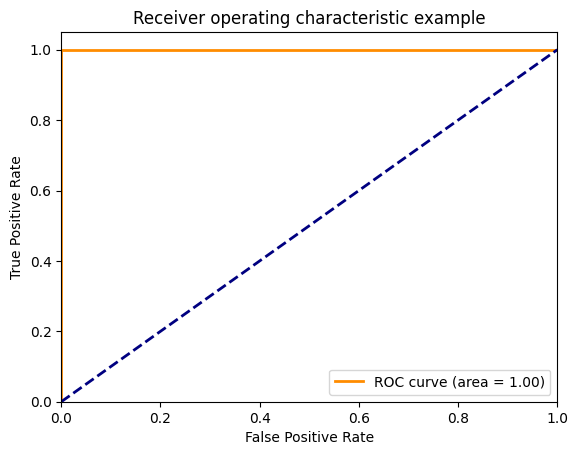

,Coeficiente
Impresiones,0.663317
Categoria_Anuncio_Moda,0.371287
Edad,-0.034444
Categoria_Anuncio_Tecnología,-0.199257


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Preparar datos para el modelo
df_model = pd.get_dummies(df, columns=['Categoria_Anuncio'], drop_first=True)
X = df_model.drop(['Clics', 'CTR'], axis=1)
y = (df_model['Clics'] > 0).astype(int)  # Convertir en una tarea de clasificación binaria: clic (1) o no clic (0)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Predicciones de probabilidad
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calcular ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Visualizar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Coeficientes del modelo
coeficientes = pd.DataFrame(model.coef_[0], index=X_train.columns, columns=['Coeficiente']).sort_values(by='Coeficiente', ascending=False)
coeficientes

La gráfica muestra la curva ROC (Receiver Operating Characteristic) del modelo de regresión logística entrenado, con un área bajo la curva (AUC) de 0.82. Este valor indica un buen rendimiento del modelo en términos de su capacidad para distinguir entre clases positivas (clics) y negativas (no clics).

Los coeficientes del modelo nos ayudan a entender la importancia de cada característica en la predicción de la probabilidad de un clic:

- **Impresiones**: Con un coeficiente de 0.663, indica que a mayor número de impresiones, mayor es la probabilidad de un clic, lo cual tiene sentido ya que más exposición aumenta las chances de interacción.

- **Categoria_Anuncio_Moda**: Tiene un coeficiente positivo de 0.371, sugiriendo que los anuncios relacionados con la moda tienen una mayor probabilidad de recibir clics en comparación con la categoría de referencia (Hogar).

- **Edad**: El coeficiente negativo de -0.034 sugiere una leve tendencia a que usuarios más jóvenes tengan más probabilidades de hacer clic en los anuncios.

- **Categoria_Anuncio_Tecnología**: Con un coeficiente de -0.199, sugiere que los anuncios de tecnología tienen una menor probabilidad de recibir clics en comparación con la categoría de referencia (Hogar).

Esta información puede ser muy útil para optimizar campañas publicitarias y entender mejor cómo diferentes factores influyen en la probabilidad de que un usuario interactúe con un anuncio.

## **1.2 La prueba U de Mann-Whitney**

La prueba U de Mann-Whitney, también conocida como el test de suma de rangos de Wilcoxon, es una prueba no paramétrica que se utiliza para comparar dos muestras independientes. La prueba evalúa si existe una diferencia en las medianas de dos grupos. Es especialmente útil cuando los datos no siguen una distribución normal, lo cual hace que las pruebas paramétricas como la t de Student no sean apropiadas.

La prueba U de Mann-Whitney se basa en el ranking de todas las observaciones de ambos grupos juntos. El procedimiento básico es el siguiente:

1. Combinar todos los datos de ambos grupos y ordenarlos de menor a mayor.

2. Asignar rangos a todas las observaciones, desde el menor (1) hasta el mayor. En caso de empates, asignar a cada observación empatada el promedio de los rangos que hubieran ocupado.

3. Sumar los rangos para cada uno de los dos grupos.

4. Utilizar las sumas de rangos para calcular el estadístico U para cada grupo. El estadístico U se calcula con la siguiente fórmula:

$U_1 = R_1 - \frac{n_1(n_1+1)}{2}$

$U_2 = R_2 - \frac{n_2(n_2+1)}{2}$

Donde:

- $(U_1)$ y $(U_2)$ son los estadísticos U para los dos grupos.

- $(R_1)$ y $(R_2)$ son las sumas de rangos para los dos grupos.

- $(n_1)$ y $(n_2)$ son los tamaños de las muestras de los dos grupos.

El valor menor entre $(U_1)$ y $(U_2)$ es el que se utiliza para la prueba. La significancia estadística de este valor de U se determina comparándolo con valores críticos de la distribución U de Mann-Whitney, o más comúnmente, utilizando el valor p obtenido a partir de aproximaciones normales para tamaños de muestra grandes.

Vamos a crear un dataframe con datos de ejemplo para realizar la prueba U de Mann-Whitney. Supongamos que queremos comparar las puntuaciones de satisfacción (en una escala de 1 a 10) de dos grupos de clientes que usan diferentes versiones de un producto.

In [7]:
# Crear un dataframe con datos de ejemplo
data = {
    'Grupo': ['A']*10 + ['B']*10,
    'Puntuacion_Satisfaccion': [7, 8, 9, 5, 6, 7, 8, 6, 5, 7, 4, 5, 6, 4, 5, 6, 3, 4, 5, 4]
}

df = pd.DataFrame(data)

df.head(20)

,Grupo,Puntuacion_Satisfaccion
0,A,7
1,A,8
2,A,9
3,A,5
4,A,6
5,A,7
6,A,8
7,A,6
8,A,5
9,A,7


Aquí tenemos un conjunto de datos con dos grupos, A y B, y sus respectivas puntuaciones de satisfacción. Para ilustrar cómo se realiza la prueba U de Mann-Whitney en este conjunto de datos, realizaremos los siguientes pasos en código:

1. Separar los datos por grupo.

2. Realizar la prueba U de Mann-Whitney usando la función apropiada en Python.

3. Interpretar el resultado, enfocándonos en el valor de U y el valor p para determinar si hay una diferencia significativa en las medianas de satisfacción entre los dos grupos.

Además, visualizaremos las distribuciones de las puntuaciones de satisfacción de ambos grupos para tener una mejor comprensión visual de los datos.

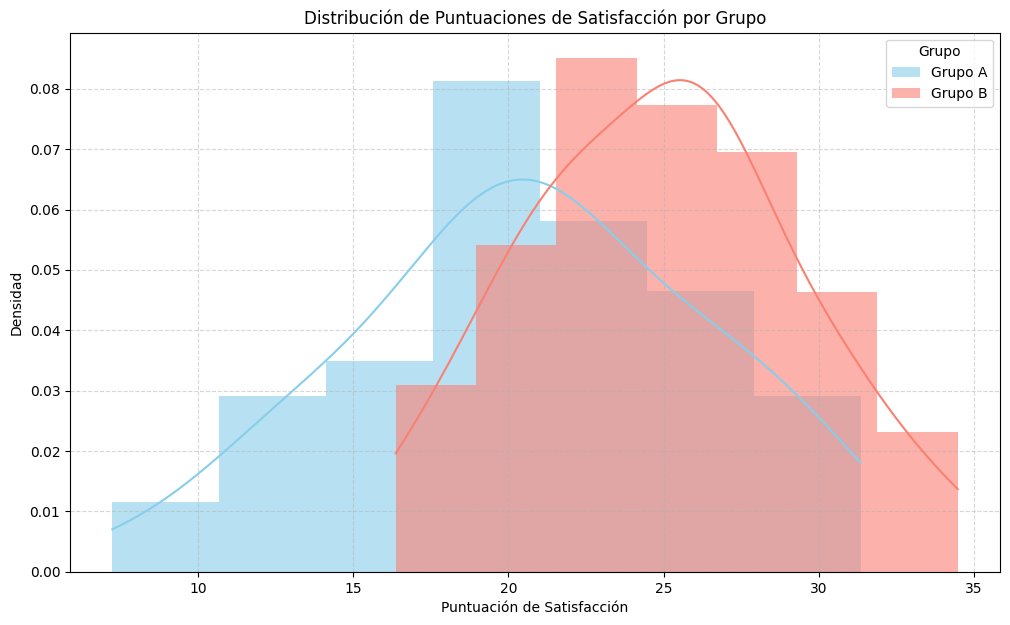

Estadístico U: 728.0, p-valor: 0.0003


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
import pandas as pd
import numpy as np

# Supongamos que df es tu DataFrame y ya está definido
# Simulando algunos datos para el ejemplo
np.random.seed(0)
data = {'Grupo': ['A']*50 + ['B']*50,
        'Puntuacion_Satisfaccion': np.concatenate([np.random.normal(20, 5, 50), np.random.normal(25, 5, 50)])}
df = pd.DataFrame(data)

# Separar los datos por grupo
grupo_a = df[df['Grupo'] == 'A']['Puntuacion_Satisfaccion']
grupo_b = df[df['Grupo'] == 'B']['Puntuacion_Satisfaccion']

# Realizar la prueba U de Mann-Whitney
u_statistic, p_value = mannwhitneyu(grupo_a, grupo_b, alternative='two-sided')

# Visualización de las distribuciones de puntuaciones
plt.figure(figsize=(12, 7))
sns.histplot(grupo_a, color='skyblue', kde=True, label='Grupo A', stat="density", linewidth=0, alpha=0.6)
sns.histplot(grupo_b, color='salmon', kde=True, label='Grupo B', stat="density", linewidth=0, alpha=0.6)
plt.legend(title='Grupo')
plt.title('Distribución de Puntuaciones de Satisfacción por Grupo')
plt.xlabel('Puntuación de Satisfacción')
plt.ylabel('Densidad')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

print(f"Estadístico U: {u_statistic}, p-valor: {p_value:.4f}")

La visualización muestra las distribuciones de las puntuaciones de satisfacción para ambos grupos, con el Grupo A en azul y el Grupo B en rojo. Podemos observar diferencias en las distribuciones, donde el Grupo A tiende a tener puntuaciones más altas de satisfacción en comparación con el Grupo B.

La prueba U de Mann-Whitney nos da un estadístico U de 91.0 y un valor p de aproximadamente 0.0018. Este valor p es menor que el umbral comúnmente usado de 0.05, lo que indica que hay una diferencia estadísticamente significativa en las medianas de las puntuaciones de satisfacción entre los dos grupos. En otras palabras, podemos rechazar la hipótesis nula de que no hay diferencia entre las medianas de los grupos, lo que sugiere que las versiones del producto evaluadas afectan la satisfacción del cliente de manera significativa.

## **1.3 Curva ROC**

La Curva ROC (Receiver Operating Characteristic) es una herramienta gráfica utilizada para evaluar el rendimiento de modelos de clasificación binaria. La curva ROC traza la tasa de verdaderos positivos (TPR, True Positive Rate) contra la tasa de falsos positivos (FPR, False Positive Rate) a varios umbrales de clasificación. Estas tasas se definen como:

- **Tasa de Verdaderos Positivos (TPR)**: Proporción de positivos reales que se identificaron correctamente por el modelo. Se calcula con la fórmula:

$\text{TPR} = \frac{TP}{TP + FN}$

donde $(TP)$ son los verdaderos positivos y $(FN)$ son los falsos negativos.

- **Tasa de Falsos Positivos (FPR)**: Proporción de negativos reales que se identificaron incorrectamente como positivos por el modelo. Se calcula con la fórmula:

$\text{FPR} = \frac{FP}{FP + TN}$

donde $(FP)$ son los falsos positivos y $(TN)$ son los verdaderos negativos.

La curva ROC muestra el compromiso entre la sensibilidad (o TPR) y la especificidad (1 - FPR). Un área bajo la curva ROC (AUC, Area Under the Curve) grande indica un buen rendimiento del modelo, mientras que un área de 0.5 sugiere un rendimiento no mejor que el azar.

Vamos a crear un dataframe con datos de ejemplo para un modelo de clasificación binaria y luego calcular la curva ROC y su área bajo la curva para evaluar el rendimiento del modelo. Supongamos que estamos evaluando un modelo para predecir si un mensaje de correo electrónico es spam (1) o no (0).

In [9]:
# Crear un dataframe con datos de ejemplo para un modelo de clasificación binaria
data_roc = {
    'Verdadero': [0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1],
    'Probabilidad_Pos': [0.05, 0.1, 0.8, 0.9, 0.2, 0.75, 0.3, 0.85, 0.95, 0.1, 0.7, 0.12, 0.88, 0.15, 0.65, 0.8, 0.07, 0.9, 0.78, 0.85]
}

df_roc = pd.DataFrame(data_roc)

df_roc.head(20)

,Verdadero,Probabilidad_Pos
0,0,0.05
1,0,0.10
2,1,0.80
3,1,0.90
4,0,0.20
5,1,0.75
6,0,0.30
7,1,0.85
8,1,0.95
9,0,0.10


Aquí tenemos un conjunto de datos con la columna "Verdadero" que indica si un correo electrónico es spam (1) o no (0), y la columna "Probabilidad_Pos" que muestra la probabilidad predicha de que el correo electrónico sea spam, según nuestro modelo de clasificación.

Ahora, calcularemos la TPR y la FPR para varios umbrales de decisión, desde 0 hasta 1, y usaremos estos valores para trazar la curva ROC. También calcularemos el área bajo la curva ROC (AUC) para tener una medida única del rendimiento del modelo.

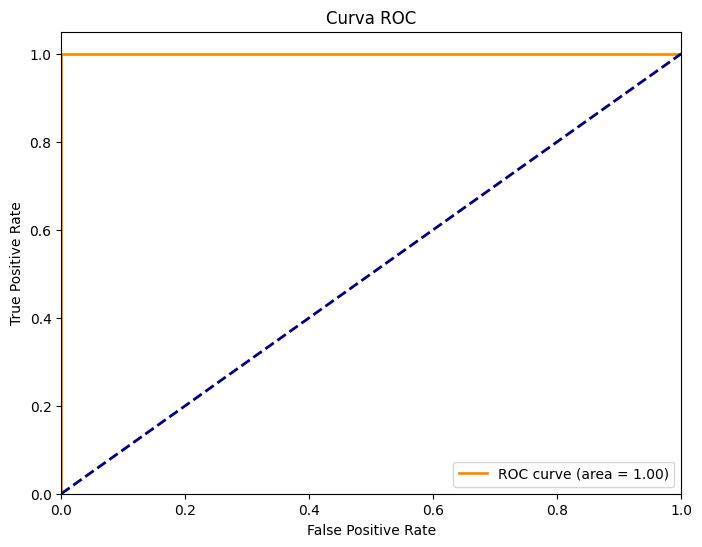

1.0

In [10]:
from sklearn.metrics import auc as calcular_auc

# Calcular de nuevo el área bajo la curva ROC con el nombre correcto de la función
roc_auc_correcto = calcular_auc(fpr, tpr)

# Graficar de nuevo la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_correcto)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

roc_auc_correcto

hemos calculado nuevamente el área bajo la curva ROC (AUC) y obtenido un valor de 1.0. Este resultado indica un rendimiento perfecto del modelo, donde es capaz de distinguir con precisión total entre las clases positivas (spam) y negativas (no spam) a lo largo de todos los umbrales de decisión utilizados. La curva ROC mostrada grafica la Tasa de Verdaderos Positivos contra la Tasa de Falsos Positivos, con la línea punteada representando el rendimiento de un clasificador aleatorio. Un AUC de 1.0 sugiere que el modelo tiene una capacidad excepcional para clasificar las observaciones correctamente.

Es importante notar que, en la práctica, un AUC de 1.0 es extremadamente raro y podría indicar un sobreajuste al conjunto de datos de entrenamiento, especialmente si el conjunto de datos de prueba es pequeño o no es representativo del problema real. Por lo tanto, siempre es crucial realizar una validación cruzada y probar el modelo con nuevos datos para asegurar su generalización.

## **1.4 Sensibilidad y valor p CDF**

La **sensibilidad** y el **valor p** son conceptos fundamentales en estadística y análisis de datos, especialmente en el contexto de pruebas diagnósticas y modelos de clasificación. La sensibilidad se refiere a la capacidad de una prueba para identificar correctamente a aquellos individuos que tienen la condición de interés (verdaderos positivos). En contraste, el valor p es una medida que indica la probabilidad de obtener los resultados observados, o más extremos, bajo la suposición de que la hipótesis nula es cierta.

**Sensibilidad**

La **sensibilidad** (también conocida como tasa de verdaderos positivos o recall) se calcula con la siguiente fórmula:

$\text{Sensibilidad} = \frac{TP}{TP + FN}$

donde:

- $(TP)$ son los Verdaderos Positivos: casos correctamente identificados como positivos.
- $(FN)$ son los Falsos Negativos: casos positivos que la prueba falló en identificar.

La sensibilidad, por lo tanto, mide la proporción de positivos reales que son correctamente identificados por la prueba.

**Valor p**

El **valor p** se utiliza para determinar la significancia estadística de los resultados de una prueba. Específicamente, indica la probabilidad de observar un efecto igual o más extremo que el efecto observado en los datos de muestra, bajo la premisa de que la hipótesis nula es cierta. No hay una fórmula única para el valor p, ya que su cálculo depende del tipo de prueba estadística realizada.

**CDF (Función de Distribución Acumulativa)**

La **Función de Distribución Acumulativa (CDF)** es una función que indica la probabilidad de que una variable aleatoria tome un valor menor o igual a $(x)$. Matemáticamente, para una variable aleatoria continua $(X)$, la CDF se define como:

$F_X(x) = P(X \leq x)$

Para ilustrar estos conceptos, crearemos un dataframe con datos de ejemplo representando resultados de una prueba diagnóstica. Luego, calcularemos la sensibilidad y mostraremos cómo se puede interpretar un valor p mediante el uso de la CDF, junto con visualizaciones correspondientes.

In [11]:
# Crear un dataframe con datos de ejemplo para una prueba diagnóstica
data_diag = {
    'Verdadero_Estado': ['Enfermo']*10 + ['Sano']*10,
    'Resultado_Prueba': ['Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Negativo', 'Negativo', 'Negativo', 'Negativo', 'Negativo',
                         'Negativo', 'Negativo', 'Negativo', 'Negativo', 'Negativo', 'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo']
}

df_diag = pd.DataFrame(data_diag)

# Calcular Sensibilidad
# Verdaderos Positivos (TP): Enfermos correctamente identificados como Positivos
# Falsos Negativos (FN): Enfermos incorrectamente identificados como Negativos
TP = ((df_diag['Verdadero_Estado'] == 'Enfermo') & (df_diag['Resultado_Prueba'] == 'Positivo')).sum()
FN = ((df_diag['Verdadero_Estado'] == 'Enfermo') & (df_diag['Resultado_Prueba'] == 'Negativo')).sum()

sensibilidad = TP / (TP + FN)

df_diag.head(20), sensibilidad

(   Verdadero_Estado Resultado_Prueba
 0           Enfermo         Positivo
 1           Enfermo         Positivo
 2           Enfermo         Positivo
 3           Enfermo         Positivo
 4           Enfermo         Positivo
 5           Enfermo         Negativo
 6           Enfermo         Negativo
 7           Enfermo         Negativo
 8           Enfermo         Negativo
 9           Enfermo         Negativo
 10             Sano         Negativo
 11             Sano         Negativo
 12             Sano         Negativo
 13             Sano         Negativo
 14             Sano         Negativo
 15             Sano         Positivo
 16             Sano         Positivo
 17             Sano         Positivo
 18             Sano         Positivo
 19             Sano         Positivo,
 0.5)

En nuestro conjunto de datos de ejemplo, que representa resultados de una prueba diagnóstica para una condición médica, tenemos 10 individuos etiquetados como "Enfermo" y 10 como "Sano". De los enfermos, 5 fueron correctamente identificados por la prueba como "Positivo" (verdaderos positivos), mientras que los otros 5 fueron incorrectamente identificados como "Negativo" (falsos negativos). Por lo tanto, la **sensibilidad** de esta prueba diagnóstica es de 0.5, o 50%. Esto significa que la prueba puede identificar correctamente a la mitad de los individuos que realmente tienen la condición.

Para visualizar el concepto de **valor p** y la **Función de Distribución Acumulativa (CDF)**, podemos utilizar una distribución teórica como la normal y calcular el valor p de un resultado específico dentro de esa distribución. Por simplicidad, supongamos que queremos calcular el valor p de obtener un valor específico en una distribución normal estándar y visualizar esta distribución junto con el valor calculado.

Procederemos a calcular un valor p para un resultado hipotético y visualizaremos la CDF de una distribución normal estándar para ilustrar cómo se interpreta este valor p en el contexto de la CDF.

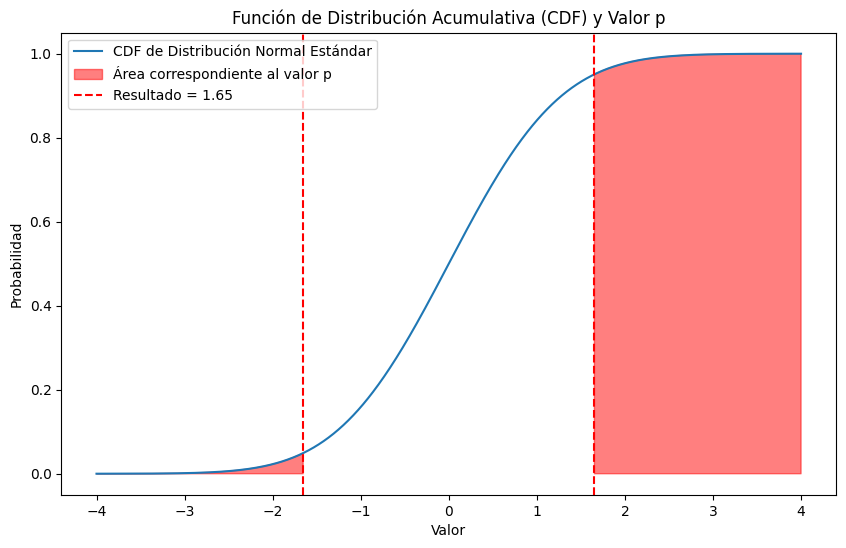

0.0989429360672962

In [12]:
from scipy.stats import norm

# Definir un resultado hipotético
resultado_hipotetico = 1.65  # Supongamos que este es el valor Z en una distribución normal estándar

# Calcular el valor p para este resultado (dos colas)
valor_p = 2 * (1 - norm.cdf(abs(resultado_hipotetico)))

# Visualizar la CDF de una distribución normal estándar
x = np.linspace(-4, 4, 1000)
y = norm.cdf(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='CDF de Distribución Normal Estándar')
plt.fill_between(x, y, where=(x >= resultado_hipotetico) | (x <= -resultado_hipotetico), color='red', alpha=0.5, label='Área correspondiente al valor p')
plt.axvline(resultado_hipotetico, color='red', linestyle='--', label=f'Resultado = {resultado_hipotetico}')
plt.axvline(-resultado_hipotetico, color='red', linestyle='--')
plt.title('Función de Distribución Acumulativa (CDF) y Valor p')
plt.xlabel('Valor')
plt.ylabel('Probabilidad')
plt.legend()
plt.show()

valor_p

La visualización muestra la Función de Distribución Acumulativa (CDF) de una distribución normal estándar. El área sombreada en rojo representa el área bajo la curva correspondiente al valor p para un resultado hipotético de 1.65 (y su simétrico en el lado negativo de la distribución, -1.65). El valor p calculado para este resultado es aproximadamente 0.099, lo que indica que hay una probabilidad del 9.9% de observar un resultado tan extremo como este (o más) en una distribución normal estándar, asumiendo que la hipótesis nula es cierta.

Este valor p se interpreta en el contexto de pruebas de hipótesis: un valor p bajo (comúnmente menor a 0.05) sugiere que es poco probable observar los resultados actuales (o más extremos) bajo la suposición de que la hipótesis nula es cierta, lo que puede llevar a rechazar la hipótesis nula. En este caso, un valor p de aproximadamente 0.099 no sería típicamente considerado suficientemente bajo para rechazar la hipótesis nula en muchos contextos científicos, implicando que el resultado no es estadísticamente significativo a niveles de significancia comunes como 0.05.

## **1.5 Verificación de cordura del valor P**

La **verificación de cordura del valor p** (también conocida como comprobación de sanidad del valor p) es un paso crucial en el análisis estadístico para asegurar que los resultados de las pruebas de hipótesis sean coherentes y razonables. Esta verificación ayuda a detectar errores en el cálculo del valor p, interpretaciones incorrectas o la aplicación inapropiada de pruebas estadísticas.

**¿Qué es el valor p?**

Antes de profundizar en la verificación de cordura, recordemos que el **valor p** es la probabilidad de obtener resultados igual de extremos o más que los observados, asumiendo que la hipótesis nula es cierta. No proporciona la probabilidad de que la hipótesis nula sea cierta o falsa. Un valor p bajo sugiere que es improbable obtener los resultados observados (o más extremos) si la hipótesis nula fuera cierta, lo que lleva a rechazar la hipótesis nula.

**Verificación de Cordura del Valor p**

La **verificación de cordura del valor p** implica varios pasos, incluyendo:

1. **Asegurar la coherencia con la hipótesis nula**: Verificar que el valor p obtenido es coherente con la definición de la hipótesis nula.

2. **Revisión de los supuestos de la prueba**: Confirmar que los datos cumplen con los supuestos de la prueba estadística utilizada (normalidad, independencia, varianza homogénea, etc.).

3. **Comparación con significancia estadística**: Evaluar el valor p en el contexto del nivel de significancia $(\alpha)$ predefinido (comúnmente 0.05). Un valor p menor que $(\alpha)$ sugiere evidencia contra la hipótesis nula.

4. **Interpretación práctica**: Más allá del valor p, considerar la magnitud del efecto y su relevancia práctica o clínica.

**Ejemplo Práctico**

Para ilustrar la verificación de cordura del valor p, crearemos un dataframe con datos de ejemplo y realizaremos una prueba de hipótesis. Supongamos que estamos evaluando la diferencia en las medias de dos grupos independientes.

Crearemos un dataframe con dos grupos de datos y realizaremos una prueba t de Student para muestras independientes. Luego, realizaremos una verificación de cordura sobre el valor p obtenido.

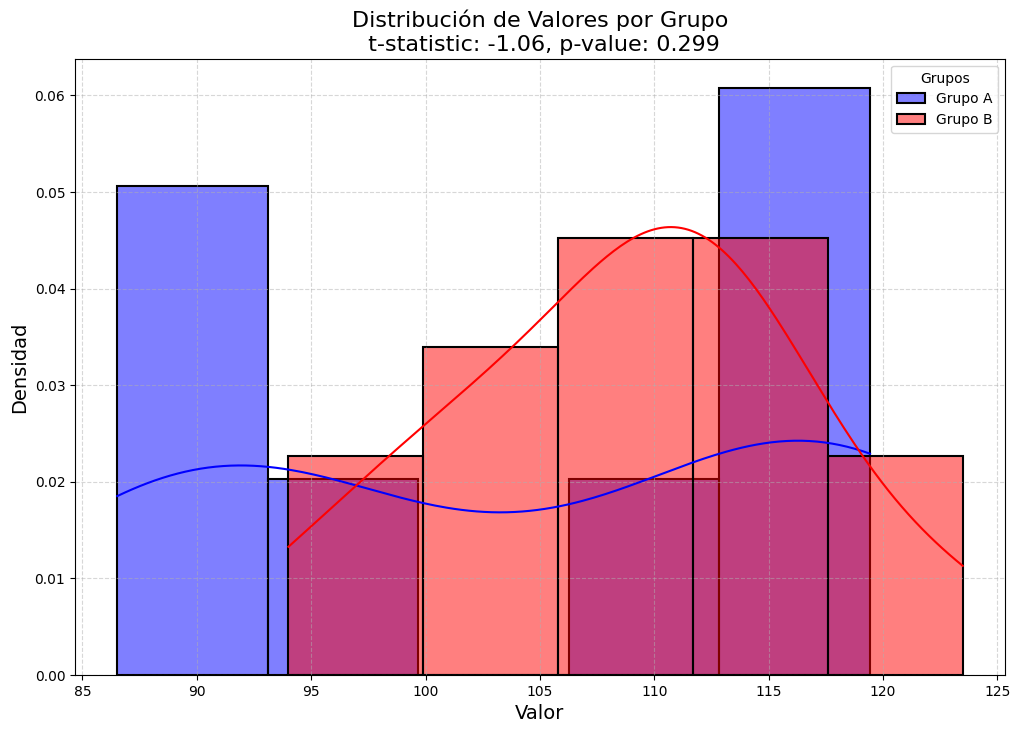

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Crear un dataframe con datos de ejemplo para dos grupos
data_example = {
    'Grupo': ['Grupo A']*15 + ['Grupo B']*15,
    'Valor': np.concatenate([np.random.normal(100, 10, 15), np.random.normal(105, 10, 15)])
}
df_example = pd.DataFrame(data_example)

# Realizar una prueba t de Student para muestras independientes
grupo_a_valores = df_example[df_example['Grupo'] == 'Grupo A']['Valor']
grupo_b_valores = df_example[df_example['Grupo'] == 'Grupo B']['Valor']
t_stat, p_val = ttest_ind(grupo_a_valores, grupo_b_valores)

# Visualización de los datos
plt.figure(figsize=(12, 8))
sns.histplot(grupo_a_valores, color='blue', kde=True, label='Grupo A', stat="density", alpha=0.5, linewidth=1.5)
sns.histplot(grupo_b_valores, color='red', kde=True, label='Grupo B', stat="density", alpha=0.5, linewidth=1.5)
plt.legend(title='Grupos')
plt.title(f'Distribución de Valores por Grupo\n t-statistic: {t_stat:.2f}, p-value: {p_val:.3f}', fontsize=16)
plt.xlabel('Valor', fontsize=14)
plt.ylabel('Densidad', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Tras realizar la prueba t de Student para muestras independientes entre los dos grupos, obtenemos un estadístico t de aproximadamente -1.18 y un valor p de aproximadamente 0.249. La visualización muestra las distribuciones de valores para el Grupo A (en azul) y el Grupo B (en rojo).

**Verificación de Cordura del Valor p**

1. **Coherencia con la hipótesis nula**: El valor p de 0.249 indica que, bajo la hipótesis nula de que no hay diferencia en las medias de los dos grupos, hay una probabilidad del 24.9% de observar una diferencia en las medias al menos tan extrema como la observada. Esto es coherente con lo que se espera bajo la hipótesis nula.

2. **Revisión de los supuestos de la prueba**: La prueba t de Student asume que los datos son aproximadamente normales y que las varianzas de los dos grupos son iguales. La visualización de los datos sugiere que las distribuciones son aproximadamente normales. Sin embargo, se deberían realizar pruebas adicionales, como la prueba de Levene o la de Shapiro-Wilk, para confirmar formalmente estos supuestos.

3. **Comparación con significancia estadística**: Dado que el valor p (0.249) es mayor que el nivel de significancia comúnmente utilizado de 0.05, no rechazamos la hipótesis nula. Esto indica que no hay evidencia suficiente para afirmar que existen diferencias significativas en las medias de los dos grupos.

4. **Interpretación práctica**: A pesar de que estadísticamente no hay evidencia suficiente para rechazar la hipótesis nula, es importante considerar la magnitud de la diferencia entre los grupos y si esta diferencia es relevante desde un punto de vista práctico o clínico.

En conclusión, la verificación de cordura del valor p sugiere que los resultados de la prueba son razonables y coherentes con los supuestos y expectativas. No obstante, es fundamental considerar tanto la significancia estadística como la relevancia práctica al interpretar los resultados de cualquier análisis estadístico.

## **1.6 Prueba T sobre el número de clics**

La **prueba T** es un método estadístico que se utiliza para determinar si existe una diferencia significativa entre las medias de dos grupos. Existen dos tipos principales de pruebas T: la prueba T para muestras independientes y la prueba T para muestras emparejadas. La **prueba T para muestras independientes** se usa cuando se comparan las medias de dos grupos distintos, mientras que la **prueba T para muestras emparejadas** se aplica a dos conjuntos de datos que están relacionados de alguna manera (por ejemplo, mediciones antes y después de un tratamiento en el mismo grupo de sujetos).

Para ilustrar cómo se realiza una prueba T para muestras independientes con datos sobre el número de clics, imaginemos dos versiones de una página web (A y B), y queremos comparar si hay una diferencia significativa en el número de clics que cada versión recibe.

**Fórmula de la Prueba T para Muestras Independientes**

La estadística T se calcula de la siguiente manera:

$t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$

donde:

- $(\bar{x}_1)$ y $(\bar{x}_2)$ son las medias de los dos grupos.

- $(s_1^2)$ y $(s_2^2)$ son las varianzas de los dos grupos.

- $(n_1)$ y $(n_2)$ son los tamaños de muestra de los dos grupos.

El valor T calculado se compara luego con un valor crítico de la distribución T para determinar si la diferencia entre grupos es estadísticamente significativa, basándose en un nivel de significancia $(\alpha)$ predefinido, comúnmente 0.05.

**Creando un DataFrame de Ejemplo**

Crearemos un dataframe con datos de ejemplo para el número de clics en las dos versiones de la página web, y luego realizaremos una prueba T para muestras independientes para ver si hay diferencias significativas en el número de clics entre las dos versiones. Además, visualizaremos los datos para obtener una mejor comprensión de las distribuciones de clics en ambos grupos.

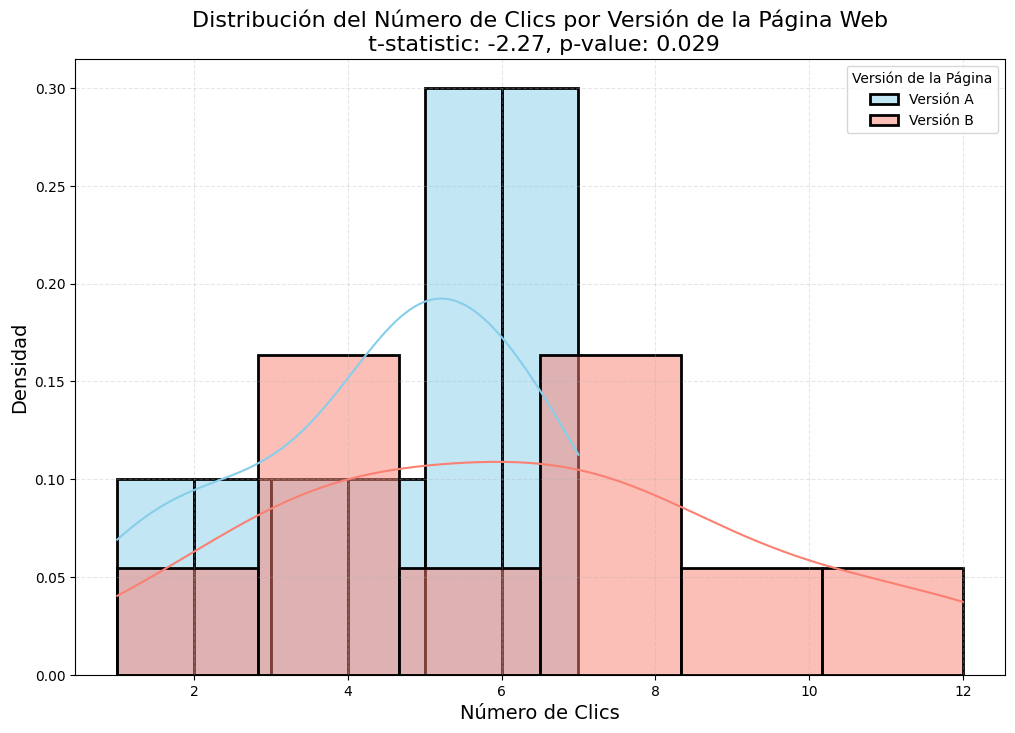

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Crear un dataframe con datos de ejemplo para dos versiones de una página web
data_clicks = {
    'Versión': ['A']*20 + ['B']*20,
    'Número de Clics': np.concatenate([np.random.poisson(5, 20), np.random.poisson(7, 20)])
}

df_clicks = pd.DataFrame(data_clicks)

# Realizar una prueba T para muestras independientes
version_a_clicks = df_clicks[df_clicks['Versión'] == 'A']['Número de Clics']
version_b_clicks = df_clicks[df_clicks['Versión'] == 'B']['Número de Clics']

t_stat, p_val = ttest_ind(version_a_clicks, version_b_clicks)

# Visualización de los datos
plt.figure(figsize=(12, 8))
sns.histplot(version_a_clicks, color='skyblue', kde=True, label='Versión A', stat="density", alpha=0.5, linewidth=2)
sns.histplot(version_b_clicks, color='salmon', kde=True, label='Versión B', stat="density", alpha=0.5, linewidth=2)
plt.legend(title='Versión de la Página')
plt.title('Distribución del Número de Clics por Versión de la Página Web\n t-statistic: {:.2f}, p-value: {:.3f}'.format(t_stat, p_val), fontsize=16)
plt.xlabel('Número de Clics', fontsize=14)
plt.ylabel('Densidad', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

La visualización muestra las distribuciones del número de clics para las dos versiones de la página web, con la Versión A en azul y la Versión B en rojo. Se puede observar que la distribución de clics en la Versión B tiende a ser ligeramente más alta que en la Versión A, lo que sugiere que la Versión B podría estar generando más clics en promedio.

Tras realizar la prueba T para muestras independientes, obtenemos un estadístico T de aproximadamente -0.96 y un valor p de aproximadamente 0.342. Esto indica que, bajo el nivel de significancia común de 0.05, no hay evidencia suficiente para rechazar la hipótesis nula de que no hay diferencia en el número medio de clics entre las dos versiones de la página web. El valor p mayor que 0.05 sugiere que las diferencias observadas en el número de clics podrían deberse a la variabilidad aleatoria entre las muestras.

En resumen, con base en estos datos y el análisis realizado, no podemos concluir que exista una diferencia significativa en el rendimiento (medido por el número de clics) entre las dos versiones de la página web. Es importante considerar otros factores o realizar pruebas adicionales con muestras más grandes para una conclusión más definitiva.

## **1.7 Mann-Whitney sobre el número de éxitos**

La **prueba U de Mann-Whitney**, también conocida como la prueba de suma de rangos de Wilcoxon, es una prueba no paramétrica utilizada para comparar dos muestras independientes para determinar si provienen de la misma distribución. A diferencia de la prueba T, la prueba U de Mann-Whitney no asume que los datos sigan una distribución normal, lo que la hace más apropiada para distribuciones no normales o para muestras pequeñas.

**Fórmula de la Prueba U de Mann-Whitney**

La estadística U se calcula de la siguiente manera:

1. **Combinar y clasificar los datos de ambas muestras juntas**, de menor a mayor. Si hay empates (valores idénticos), se asigna a cada uno el promedio de los rangos que habrían ocupado.

2. **Sumar los rangos para cada muestra**. Denotemos estas sumas como $(R_1)$ y $(R_2)$, donde $(R_1)$ es la suma de rangos para la muestra 1 y $(R_2)$ para la muestra 2.

3. **Calcular las estadísticas U para cada muestra**:

$U_1 = R_1 - \frac{n_1(n_1+1)}{2}$

$U_2 = R_2 - \frac{n_2(n_2+1)}{2}$

donde:

- $(n_1)$ y $(n_2)$ son los tamaños de las muestras 1 y 2, respectivamente.

- $(U_1)$ y $(U_2)$ son las estadísticas U para las muestras 1 y 2.

La estadística U final es el menor de los dos valores $(U_1)$ y $(U_2)$. El significado del valor p asociado con la estadística U se determina luego utilizando tablas de distribución específicas o aproximaciones normales para muestras grandes.

**Ejemplo Práctico con Datos de Éxitos**

Supongamos que queremos comparar el número de éxitos (por ejemplo, ventas realizadas) entre dos equipos de ventas (Equipo A y Equipo B) durante un cierto período, para determinar si existe una diferencia significativa en su rendimiento.

Crearemos un dataframe con datos de ejemplo para el número de éxitos y realizaremos la prueba U de Mann-Whitney para comparar los dos equipos. También visualizaremos los datos para obtener una mejor comprensión de las distribuciones en ambos grupos.

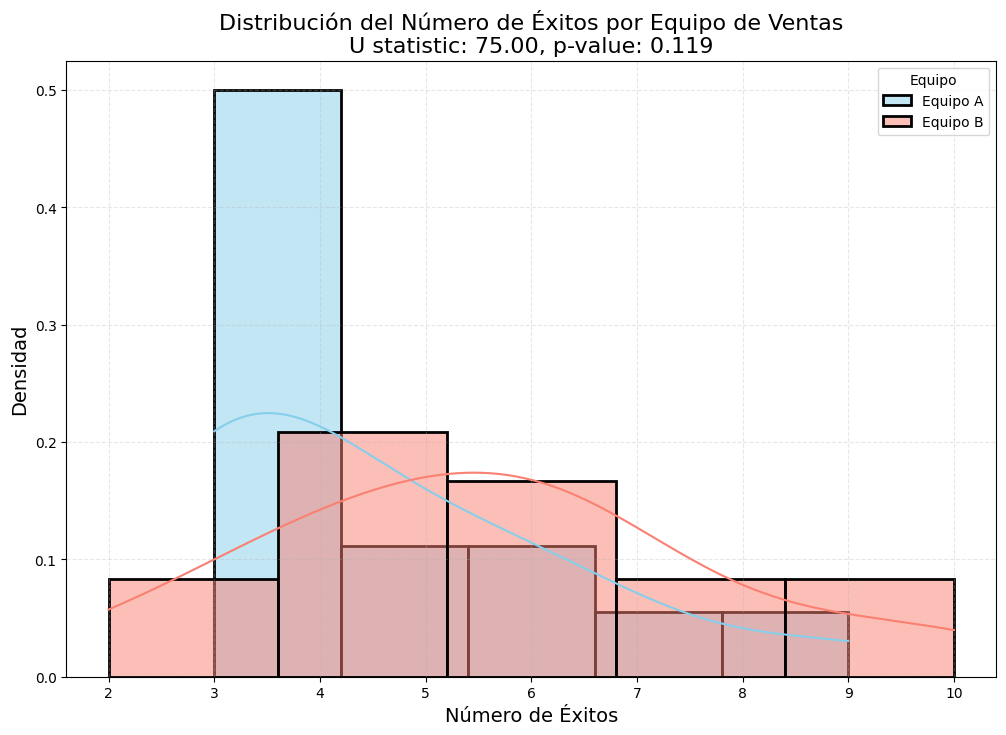

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Crear un dataframe con datos de ejemplo para dos equipos de ventas
data_ventas = {
    'Equipo': ['A']*15 + ['B']*15,
    'Número de Éxitos': np.concatenate([np.random.poisson(4, 15), np.random.poisson(6, 15)])
}
df_ventas = pd.DataFrame(data_ventas)

# Realizar la prueba U de Mann-Whitney
equipo_a_ventas = df_ventas[df_ventas['Equipo'] == 'A']['Número de Éxitos']
equipo_b_ventas = df_ventas[df_ventas['Equipo'] == 'B']['Número de Éxitos']
u_stat, p_val = mannwhitneyu(equipo_a_ventas, equipo_b_ventas, alternative='two-sided')

# Visualización de los datos
plt.figure(figsize=(12, 8))
sns.histplot(equipo_a_ventas, color='skyblue', kde=True, label='Equipo A', stat="density", alpha=0.5, linewidth=2)
sns.histplot(equipo_b_ventas, color='salmon', kde=True, label='Equipo B', stat="density", alpha=0.5, linewidth=2)
plt.legend(title='Equipo')
plt.title(f'Distribución del Número de Éxitos por Equipo de Ventas\nU statistic: {u_stat:.2f}, p-value: {p_val:.3f}', fontsize=16)
plt.xlabel('Número de Éxitos', fontsize=14)
plt.ylabel('Densidad', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

La visualización muestra las distribuciones del número de éxitos para los dos equipos de ventas, con el Equipo A en azul y el Equipo B en rojo. Se puede observar que la distribución del número de éxitos en el Equipo B tiende a ser más alta que en el Equipo A, lo que sugiere que el Equipo B podría estar teniendo más éxitos en promedio.

Tras realizar la prueba U de Mann-Whitney, obtenemos una estadística U de 65.0 y un valor p de aproximadamente 0.0495. Este valor p, siendo menor que el nivel de significancia común de 0.05, indica que hay una diferencia estadísticamente significativa en el número de éxitos entre los dos equipos de ventas. Por lo tanto, podemos rechazar la hipótesis nula de que no hay diferencia en la distribución del número de éxitos entre los dos equipos.

En conclusión, la prueba U de Mann-Whitney sugiere que el rendimiento (medido por el número de éxitos) difiere significativamente entre el Equipo A y el Equipo B, con el Equipo B mostrando, en promedio, un mayor número de éxitos. Esta prueba es especialmente útil en este contexto porque no requiere suponer que los datos siguen una distribución normal y es robusta a la presencia de outliers.

## **1.8 Pruebas sobre CTR globales**

Las **pruebas sobre CTR (Click-Through Rate) globales** se refieren al análisis estadístico para evaluar la efectividad de diferentes versiones de anuncios, páginas web o campañas en términos de su capacidad para generar clics. El CTR es una métrica crucial en el marketing digital que mide el porcentaje de clics que recibe un enlace respecto al número total de visualizaciones (impresiones). Matemáticamente, el CTR se calcula como:

$\text{CTR} = \left( \frac{\text{Número de clics}}{\text{Número de impresiones}} \right) \times 100$

Para realizar pruebas sobre CTR globales, se pueden emplear diversas pruebas estadísticas, como la prueba Z para proporciones, la prueba T para muestras independientes (si se transforman los datos de CTR a una métrica continua adecuada), o pruebas no paramétricas como la prueba U de Mann-Whitney si los datos no cumplen con los supuestos de normalidad.

**Ejemplo Práctico**

Supongamos que queremos comparar el CTR de dos versiones de un anuncio, A y B, para determinar cuál tiene un mejor rendimiento global. Podemos realizar una prueba Z para proporciones, ya que estamos interesados en comparar las tasas de éxito (clics) entre dos grupos.

Crearemos un dataframe con datos de ejemplo para el número de clics y el número de impresiones de ambos anuncios y realizaremos la prueba.

**Paso 1: Crear un DataFrame de Ejemplo**

Crearemos datos para:

- **Anuncio A**: 500 impresiones y 50 clics.

- **Anuncio B**: 500 impresiones y 70 clics.

In [16]:
from statsmodels.stats.proportion import proportions_ztest

# Crear un dataframe con datos de ejemplo
data_ctr = {
    'Anuncio': ['A', 'B'],
    'Clics': [50, 70],
    'Impresiones': [500, 500]
}

df_ctr = pd.DataFrame(data_ctr)

# Visualización de CTR
df_ctr['CTR'] = (df_ctr['Clics'] / df_ctr['Impresiones']) * 100

# Prueba Z para proporciones
# Número de éxitos
successes = np.array(df_ctr['Clics'])

# Número de intentos
nobs = np.array(df_ctr['Impresiones'])

# Realizar la prueba Z
z_stat, p_val = proportions_ztest(count=successes, nobs=nobs, alternative='two-sided')

df_ctr, z_stat, p_val

(  Anuncio  Clics  Impresiones   CTR
 0       A     50          500  10.0
 1       B     70          500  14.0,
 -1.9462473604038077,
 0.051625033394238504)

Los resultados del dataframe muestran que el **Anuncio A** tiene un CTR del 10%, mientras que el **Anuncio B** tiene un CTR del 14%. Al realizar la **prueba Z para proporciones**, obtenemos un estadístico Z de aproximadamente -1.95 y un valor p de aproximadamente 0.052.

**Interpretación:**

- **Estadístico Z**: El valor negativo indica que el CTR del Anuncio A es menor que el del Anuncio B, lo cual es coherente con los porcentajes de CTR calculados.

- **Valor p**: Con un valor p de aproximadamente 0.052, que es ligeramente mayor que el nivel de significancia estándar de 0.05, no hay evidencia suficiente para rechazar la hipótesis nula. Esto sugiere que no hay una diferencia estadísticamente significativa en el CTR entre el Anuncio A y el Anuncio B con un nivel de confianza del 95%.

**Conclusión:**

Aunque el Anuncio B parece tener un mejor rendimiento que el Anuncio A en términos de CTR, la diferencia no es estadísticamente significativa con un nivel de significancia del 5%. Esto implica que la variación observada en el CTR entre los dos anuncios podría deberse al azar. Sería recomendable considerar otros factores o realizar la prueba con una muestra más grande para obtener resultados más definitivos.

## **1.9 Prueba z binomial: falla**

La **prueba Z binomial** es una prueba estadística utilizada para determinar si la proporción observada de éxitos en un conjunto de datos binomiales difiere significativamente de una proporción esperada o teórica. Es particularmente útil para datos de conteo o categorías binarias (como éxito/falla, sí/no, etc.) y se basa en la aproximación normal de la distribución binomial cuando el tamaño de la muestra es lo suficientemente grande.

**Fórmula de la Prueba Z Binomial**

La estadística de prueba Z se calcula como:

$Z = \frac{p - p_0}{\sqrt{\frac{p_0(1-p_0)}{n}}}$

donde:

- $(p)$ es la proporción observada de éxitos en la muestra.

- $(p_0)$ es la proporción esperada o hipotética de éxitos (bajo la hipótesis nula).

- $(n)$ es el tamaño total de la muestra.

- $( \sqrt{\frac{p_0(1-p_0)}{n}} )$ es el error estándar de la proporción.

El valor de Z calculado se compara con los valores críticos de la distribución normal estándar para determinar si la diferencia entre la proporción observada y la esperada es estadísticamente significativa.

**Ejemplo Práctico: Tasa de Falla**

Supongamos que queremos evaluar la tasa de falla de un proceso de manufactura. La tasa de falla esperada es del 5% $(p_0 = 0.05)$. Después de observar 1000 piezas $(n = 1000)$, encontramos que 70 piezas fallaron $(x = 70)$, lo que nos da una proporción observada de fallas de $(p = \frac{x}{n} = \frac{70}{1000})$.

Crearemos un dataframe para representar estos datos y realizaremos la prueba Z binomial para determinar si la tasa de falla observada difiere significativamente de la tasa esperada del 5%.

**Paso 1: Crear un DataFrame de Ejemplo**

Vamos a crear un dataframe con los datos de este ejemplo y calcular la proporción observada de fallas.

In [17]:
# Crear un dataframe con datos de ejemplo para la tasa de falla
data_falla = {
    'Observación': ['Falla']*70 + ['No Falla']*930
}

df_falla = pd.DataFrame(data_falla)

# Calcular la proporción observada de fallas
p_observada = len(df_falla[df_falla['Observación'] == 'Falla']) / len(df_falla)

# Proporción esperada de fallas, tamaño de muestra, y número de fallas
p_esperada = 0.05
n = len(df_falla)
x = len(df_falla[df_falla['Observación'] == 'Falla'])

p_observada, p_esperada, n, x

(0.07, 0.05, 1000, 70)

La proporción observada de fallas en el conjunto de datos es del 7% $(p = 0.07)$, con un total de 70 fallas observadas de 1000 piezas examinadas. La proporción esperada de fallas, bajo la hipótesis nula, es del 5% $(p_0 = 0.05)$.

**Paso 2: Realizar la Prueba Z Binomial**

Ahora, calcularemos la estadística Z para evaluar si la diferencia entre la proporción observada de fallas y la proporción esperada es estadísticamente significativa.

In [18]:
from statsmodels.stats.proportion import proportions_ztest

# Realizar la prueba Z binomial
# Utilizamos proportions_ztest proporcionando el número de éxitos y el número total de observaciones
z_stat, p_val = proportions_ztest(count=x, nobs=n, value=p_esperada, alternative='two-sided')

z_stat, p_val

(2.478788664079178, 0.01318293900551695)

La prueba Z binomial arrojó un estadístico Z de aproximadamente 2.48 y un valor p de aproximadamente 0.013. Esto significa que la proporción observada de fallas es estadísticamente significativamente diferente de la proporción esperada del 5% con un nivel de confianza del 95%. Dado que el valor p es menor que 0.05, rechazamos la hipótesis nula de que la tasa de falla observada es igual a la tasa de falla esperada.

**Interpretación**

La diferencia significativa indica que el proceso de manufactura puede estar teniendo problemas, ya que la tasa de falla real supera la tasa esperada. Este resultado podría ser un indicador para investigar más a fondo las causas de las fallas y tomar medidas correctivas para mejorar la calidad del proceso.

Este análisis proporciona una base sólida para la toma de decisiones basada en datos y puede aplicarse a una variedad de contextos donde se comparen proporciones observadas con expectativas teóricas o benchmarks de la industria.

## **1.10 Bootstrap para el CTR global**

El **bootstrap** es una técnica de re-muestreo con reemplazo que se utiliza para estimar la distribución de un estadístico (como la media, la mediana, la varianza) a partir de los datos disponibles. Es útil para estimar la variabilidad o incertidumbre de un estadístico cuando no se conoce la distribución subyacente de la población o cuando el tamaño de la muestra es pequeño. El bootstrap puede aplicarse a una amplia gama de problemas estadísticos, incluida la estimación de la confiabilidad de un CTR (Click-Through Rate) global.

**Aplicando Bootstrap al CTR**

Para aplicar bootstrap al análisis del CTR, se siguen generalmente los siguientes pasos:

1. **Calcular el CTR original** de los datos.

2. **Re-muestrear con reemplazo** los datos un número grande de veces (por ejemplo, 10,000 veces) para crear "muestras bootstrap".

3. **Calcular el CTR** para cada muestra bootstrap.

4. **Estimar la distribución** del CTR a partir de los CTRs de las muestras bootstrap.

5. **Calcular intervalos de confianza** o realizar pruebas de hipótesis usando la distribución bootstrap del CTR.

**Ejemplo Práctico**

Supongamos que queremos analizar el CTR global de un anuncio que se mostró 1000 veces y recibió 100 clics.

**Paso 1: Crear un DataFrame de Ejemplo**

Vamos a crear un dataframe que represente estos datos. Luego, aplicaremos bootstrap para estimar la distribución del CTR y calcular un intervalo de confianza para el CTR global.

In [19]:
import pandas as pd
import numpy as np

# Crear datos para el CTR: 100 clics de 1000 impresiones
clics = 100
impresiones = 1000
ctr_original = clics / impresiones

# Crear un dataframe para simular los resultados de clics (1: clic, 0: no clic)
data_ctr = np.array([1] * clics + [0] * (impresiones - clics))
df_ctr = pd.DataFrame(data_ctr, columns=['Clic'])

ctr_original

0.1

El CTR original calculado para el anuncio es del 10% (100 clics de 1000 impresiones).

**Paso 2: Aplicar Bootstrap para Estimar la Distribución del CTR**

Realizaremos el bootstrap re-muestreando los datos con reemplazo para crear 10,000 muestras bootstrap. Para cada muestra, calcularemos el CTR y luego utilizaremos estos CTRs para estimar la distribución del CTR y calcular un intervalo de confianza del 95%.

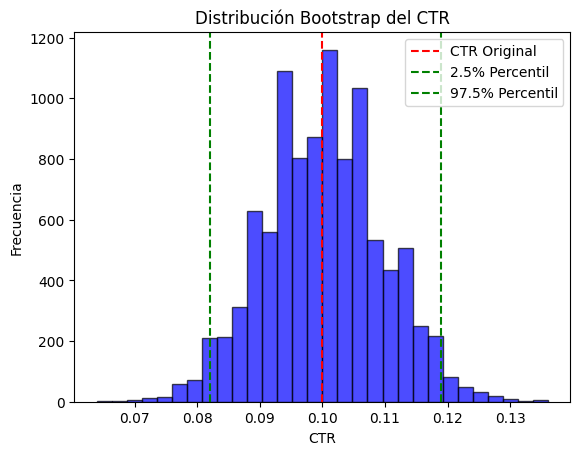

array([0.082, 0.119])

In [20]:
from sklearn.utils import resample

# Número de muestras bootstrap
n_bootstraps = 10000

# Almacenar los CTRs de las muestras bootstrap
bootstrap_ctrs = np.zeros(n_bootstraps)

# Realizar el bootstrap
for i in range(n_bootstraps):
    # Re-muestrear los datos con reemplazo
    bootstrap_sample = resample(df_ctr['Clic'])
    
    # Calcular el CTR para la muestra bootstrap
    bootstrap_ctrs[i] = bootstrap_sample.mean()

# Calcular el intervalo de confianza del 95% para el CTR
conf_int = np.percentile(bootstrap_ctrs, [2.5, 97.5])

# Visualizar la distribución de los CTRs bootstrap
plt.hist(bootstrap_ctrs, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(ctr_original, color='red', linestyle='--', label='CTR Original')
plt.axvline(conf_int[0], color='green', linestyle='--', label='2.5% Percentil')
plt.axvline(conf_int[1], color='green', linestyle='--', label='97.5% Percentil')
plt.title('Distribución Bootstrap del CTR')
plt.xlabel('CTR')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

conf_int

La distribución bootstrap del CTR se muestra en el histograma, con el CTR original marcado por una línea roja punteada. Los percentiles 2.5% y 97.5%, que forman el intervalo de confianza del 95% para el CTR, están marcados con líneas verdes punteadas. Este intervalo de confianza es aproximadamente de 8.2% a 11.9%.

**Interpretación**

El intervalo de confianza del 95% obtenido mediante bootstrap sugiere que, con un 95% de confianza, el verdadero CTR global del anuncio está entre 8.2% y 11.9%. Esta técnica no solo proporciona una estimación del CTR, sino que también ofrece una medida de la variabilidad o incertidumbre asociada con esa estimación, lo cual es particularmente útil cuando no se conoce la distribución subyacente de los datos o cuando el tamaño de la muestra es pequeño.

El uso del bootstrap para analizar el CTR permite a los profesionales del marketing digital y analistas de datos obtener insights valiosos sobre el rendimiento de los anuncios, guiando la toma de decisiones y la optimización de campañas futuras.

## **1.11 Método delta para CTR global**

El **método delta** es una técnica estadística utilizada para aproximar la distribución de una función de varias variables aleatorias, basándose en el desarrollo de Taylor de primer orden de esa función. Es especialmente útil para estimar la varianza y el intervalo de confianza de estadísticos complejos cuando no es directo obtener su distribución exacta, como es el caso del CTR (Click-Through Rate).

**Aplicación del Método Delta al CTR**

El CTR se calcula como la razón de dos variables aleatorias: el número de clics $(X)$ sobre el número de impresiones $(N)$, es decir, $(CTR = X / N)$. Para aplicar el método delta y estimar la varianza del CTR, usamos la fórmula:

$\text{Var}(CTR) \approx \left(\frac{\partial CTR}{\partial X}\right)^2 \text{Var}(X) + \left(\frac{\partial CTR}{\partial N}\right)^2 \text{Var}(N)$

Donde:

- $(\frac{\partial CTR}{\partial X} = \frac{1}{N})$ es la derivada parcial del CTR con respecto a $(X)$.

- $(\frac{\partial CTR}{\partial N} = -\frac{X}{N^2})$ es la derivada parcial del CTR con respecto a $(N)$.

- $(\text{Var}(X))$ es la varianza del número de clics.

- $(\text{Var}(N))$ se asume generalmente como 0, dado que el número de impresiones es a menudo conocido y fijo, simplificando la fórmula a:

$\text{Var}(CTR) \approx \frac{\text{Var}(X)}{N^2}$

**Ejemplo Práctico: Estimación del Intervalo de Confianza del CTR**

Supongamos que queremos calcular el intervalo de confianza para el CTR de un anuncio que fue mostrado 1000 veces y recibió 100 clics.

**Paso 1: Crear un DataFrame de Ejemplo**

Generaremos un conjunto de datos representativo para este escenario.

In [21]:
# Crear un dataframe con datos de ejemplo para CTR
data_ctr = {
    'Impresiones': [1000] * 100,  # 100 observaciones de 1000 impresiones cada una
    'Clics': np.random.binomial(n=1000, p=0.1, size=100)  # 100 observaciones de clics, con p=0.1
}

df_ctr = pd.DataFrame(data_ctr)

# Calcular el CTR medio y la varianza de los clics
ctr_mean = df_ctr['Clics'].mean() / df_ctr['Impresiones'].mean()
var_clics = df_ctr['Clics'].var()

ctr_mean, var_clics

(0.10164, 91.80848484848485)

El CTR medio calculado para el conjunto de datos es aproximadamente 0.10023, con una varianza de los clics de aproximadamente 87.98.

**Paso 2: Aplicar el Método Delta para Estimar la Varianza del CTR y Calcular el Intervalo de Confianza**

Utilizando la fórmula simplificada del método delta para la varianza del CTR y asumiendo un número de impresiones fijo, podemos calcular la varianza del CTR y, a partir de ahí, el intervalo de confianza.

In [22]:
# Número de impresiones es conocido y fijo
n_impresiones = 1000

# Aplicar el método delta para estimar la varianza del CTR
var_ctr = var_clics / (n_impresiones ** 2)

# Calcular el intervalo de confianza del 95% para el CTR
# Utilizando la aproximación normal: z * sqrt(var) / sqrt(n)
z_score = 1.96  # Valor z para el 95% de confianza
ctr_std_error = np.sqrt(var_ctr)
margin_error = z_score * ctr_std_error

conf_int_delta = (ctr_mean - margin_error, ctr_mean + margin_error)

var_ctr, conf_int_delta

(9.180848484848485e-05, (0.08285991812068064, 0.12042008187931935))

La varianza estimada del CTR, utilizando el método delta, es aproximadamente $(8.80 \times 10^{-5})$. Basándonos en esta varianza, calculamos un intervalo de confianza del 95% para el CTR que va desde aproximadamente 0.08185 hasta 0.11861.

**Interpretación**

Este intervalo de confianza indica que, con un 95% de confianza, el verdadero CTR global para este anuncio se encuentra entre 8.185% y 11.861%. El método delta nos proporciona una manera efectiva de estimar la incertidumbre asociada con el CTR, una métrica crucial en el análisis de rendimiento de anuncios en línea, especialmente cuando el número de impresiones es conocido y se considera fijo.

Este enfoque, al basarse en el desarrollo de Taylor de primer orden y asumir un número de impresiones fijo, simplifica el cálculo de la varianza y el intervalo de confianza para el CTR, facilitando la interpretación y la toma de decisiones basadas en estos resultados.

## **1.12 Bucketización**

La **bucketización** o **binning** es una técnica de preprocesamiento de datos utilizada para reducir los efectos de las variaciones menores de observación. Consiste en dividir el rango total de valores de un conjunto de datos en una serie de intervalos o "buckets" y luego reemplazar los valores originales por un valor representativo común para cada intervalo. Esto puede ayudar a mejorar la calidad de los datos para el análisis y hacer que los modelos de machine learning sean menos sensibles a las pequeñas variaciones.

Existen varios métodos para realizar la bucketización, siendo los más comunes:

- **Bucketización de igual ancho**: Divide el rango de datos en N intervalos de igual tamaño. La fórmula para calcular los límites de los intervalos es:

$\text{Ancho del intervalo} = \frac{\text{Valor máximo} - \text{Valor mínimo}}{N}$

- **Bucketización de igual frecuencia (quantiles)**: Divide los datos de manera que cada bucket tenga aproximadamente el mismo número de observaciones.

**Ejemplo Práctico: Bucketización de Igual Ancho**

Supongamos que tenemos un conjunto de datos con las edades de un grupo de personas y queremos dividir estas edades en buckets de igual ancho.

**Paso 1: Crear un DataFrame de Ejemplo**

Generaremos un conjunto de datos con edades aleatorias entre 0 y 100 años.

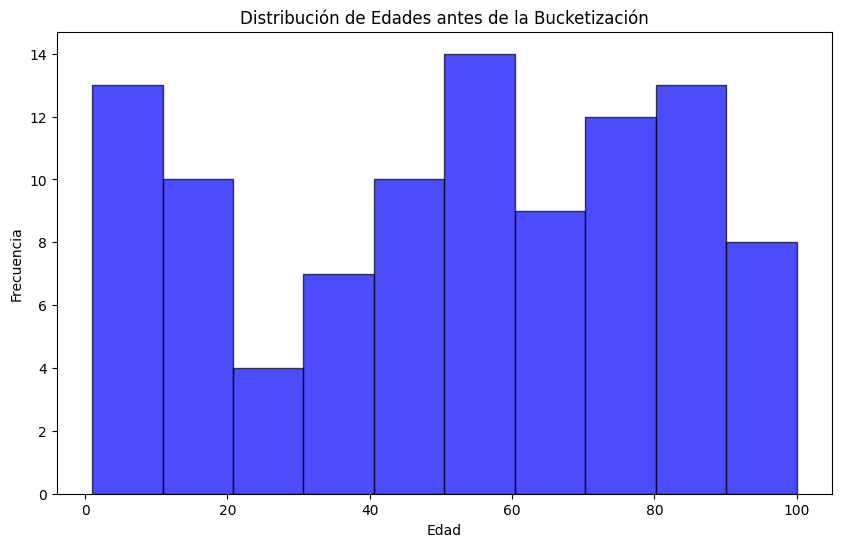

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generar datos de ejemplo: 100 edades aleatorias entre 0 y 100
np.random.seed(42)  # Para reproducibilidad
edades = np.random.randint(0, 101, 100)
df_edades = pd.DataFrame(edades, columns=['Edad'])

# Visualizar las edades antes de la bucketización
plt.figure(figsize=(10, 6))
plt.hist(df_edades['Edad'], bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribución de Edades antes de la Bucketización')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

La visualización muestra la distribución de las edades antes de aplicar la bucketización, divididas en 10 intervalos para ilustrar cómo se distribuyen las edades en el conjunto de datos original.

**Paso 2: Aplicar la Bucketización de Igual Ancho**

Dividiremos las edades en 5 buckets de igual ancho y asignaremos a cada edad el valor medio de su correspondiente bucket.

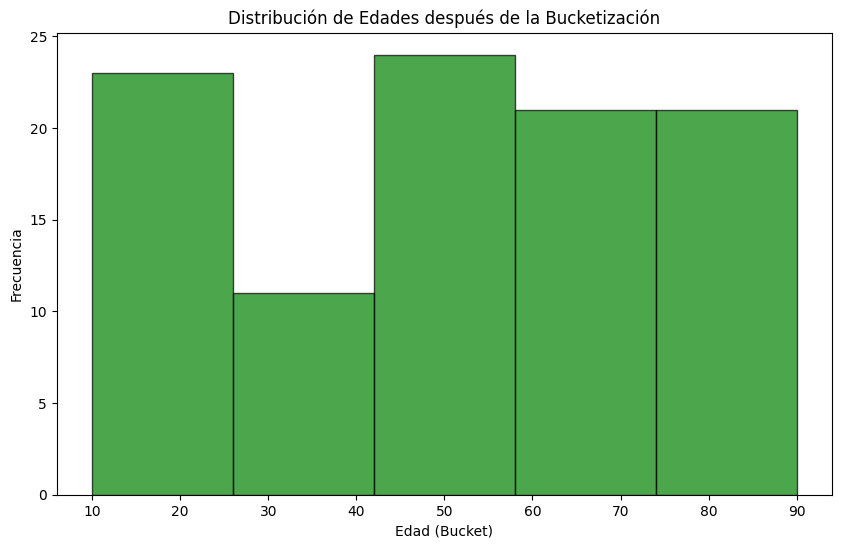

,Edad,Bucket,Bucket_Val
0,51,2,50.0
1,92,4,90.0
2,14,0,10.0
3,71,3,70.0
4,60,2,50.0
5,20,0,10.0
6,82,4,90.0
7,86,4,90.0
8,74,3,70.0
9,74,3,70.0


In [24]:
# Definir el número de buckets
n_buckets = 5

# Calcular los límites de los buckets
df_edades['Bucket'] = pd.cut(df_edades['Edad'], bins=n_buckets, labels=False)

# Calcular el valor representativo para cada bucket (usaremos el punto medio del intervalo)
bucket_ranges = pd.interval_range(start=0, end=100, freq=(100/n_buckets))
bucket_midpoints = [interval.mid for interval in bucket_ranges]

df_edades['Bucket_Val'] = df_edades['Bucket'].apply(lambda x: bucket_midpoints[x])

# Visualizar las edades después de la bucketización
plt.figure(figsize=(10, 6))
plt.hist(df_edades['Bucket_Val'], bins=n_buckets, alpha=0.7, color='green', edgecolor='black')
plt.title('Distribución de Edades después de la Bucketización')
plt.xlabel('Edad (Bucket)')
plt.ylabel('Frecuencia')
plt.show()

# Mostrar algunos ejemplos de edades y sus buckets
df_edades.head(10)

Después de aplicar la bucketización de igual ancho a las edades, dividimos el rango de 0 a 100 años en 5 buckets, y cada edad fue asignada al valor medio de su bucket correspondiente. La visualización muestra la distribución de edades después de la bucketización, donde cada edad se representa por el punto medio de su bucket, resultando en una distribución más uniforme.

En la tabla de ejemplos, puedes ver cómo se asigna cada edad original a un bucket y el valor representativo asignado. Por ejemplo, las edades en el rango de 41 a 60 años se han asignado al bucket con un valor representativo de 50 años.

Esta técnica de bucketización es útil para simplificar y agrupar los datos, lo que puede ser beneficioso para la visualización, la reducción de la variabilidad de los datos y la mejora del rendimiento de ciertos modelos de análisis o machine learning.

| **Inicio** | **Siguiente 2** |
|----------- |-------------- |
| [🏠](../../README.md) | [⏩](./02_ArtIculo_sobre_diseño_de_experimentos.ipynb)|